 Image Analysis in Python: Modern Approach for Face, Age, Emotion, and Clothing Detection

This notebook walks through a **complete modern pipeline** for analyzing a human subject in an image. We use **TensorFlow 2.14+ compatible libraries** like `insightface`, `mediapipe`, and `fer`, and explain each step in plain, practical language.


##How to Use This Jupyter Notebook

This notebook provides a modern pipeline for analyzing a human subject in an image using Python and AI-based tools. It performs:

- Face detection

- Demographic estimation (age and gender)

- Emotion detection

- Clothing region extraction and color analysis

- Clothing type classification using OpenAI's CLIP model

- Annotated visual output and summary report


##Requirements
Before running the notebook, make sure to install the following libraries (if not already installed):
- opencv-python
- matplotlib
- numpy
- insightface
- fer
- mediapipe
- scikit-learn
- git+https://github.com/openai/CLIP.git
- torch
- torchvision

Pip Install commands for the libraries are at the end of the file. Please run them first.

## Step-by-Step Instructions

1. Upload an image file
- The notebook will prompt you to upload an image of a person. Ideally, the upper body and face should be clearly visible.

2. Run each cell sequentially
- Start from the top and execute each code cell in order.

3. Review visual outputs

- The original image will be displayed.

- A cropped shirt region will be shown.

- An annotated image will include bounding boxes and prediction labels.

4. Check the final summary
A final report will print:

- Detected age and gender

- Emotion (with confidence)

- Shirt color (RGB)

- Clothing type (with confidence)

5. Optional: Modify the labels
- In the CLIP section, you can change the list of clothing types to test other categories.

## Setup: Install Dependencies

In [1]:
## Step 1: Import Libraries
import cv2
import matplotlib.pyplot as plt
import mediapipe as mp
import numpy as np
from fer import FER
import insightface
import torch
import clip
from PIL import Image


  if event.key is 'enter':



### Why these libraries?
- **InsightFace**: Accurate and fast face, age, and gender detection (built on ONNX (Open Neural Network Exchange) backend).
- **FER**: Lightweight emotion recognition using common CNN (convolutional neural network) models.
- **MediaPipe**: Efficient face and body landmark detection — great for visual overlays and posture estimation.
- **OpenCV**: Standard for image manipulation.
- **Matplotlib**: Easy visualization in notebooks.
- **CLIP**: CLIP is a vision-language model that understands images in the context of textual prompts, we will use it to match an image region to labels

Step-by-Step Guide: How to Analyze an Image

Step 1: Load the Image
Use Python with OpenCV and Matplotlib to load the image.

Saving gettyimages-1454249725-612x612.jpg to gettyimages-1454249725-612x612.jpg


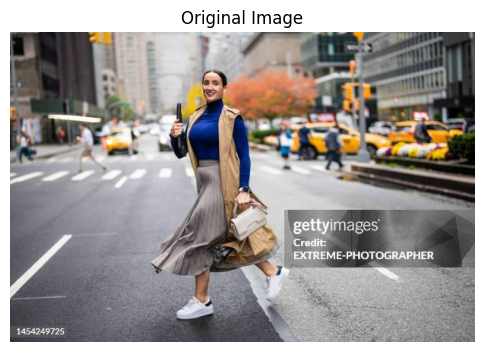

In [63]:
# Display inline for Jupyter
%matplotlib inline

# Section 2: Load and Display Image
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0] # Extract the filename from the dictionary

# using OpenCV
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Using matplotlib.pyplot to show the image
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [64]:
# Section 3: Face Detection and Demographics Detection
face_analyzer = insightface.app.FaceAnalysis(name='buffalo_l')
face_analyzer.prepare(ctx_id=0)  # Set ctx_id=-1 for CPU only
faces = face_analyzer.get(img)

# Create a copy of the image to draw on
img_annotated = img.copy()

if faces:
    face = faces[0]
    print(f"Age: {face.age}")
    print(f"Gender: {'Male' if face.gender == 1 else 'Female'}")

    # Draw face bounding box
    x1, y1, x2, y2 = [int(v) for v in face.bbox]
    cv2.rectangle(img_annotated, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Add age/gender label
    label = f"Age: {face.age}, {'Male' if face.gender == 1 else 'Female'}"
    cv2.putText(img_annotated, label, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("No face detected. Please try another image.")

  warnings.warn(



Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4



Age: 34
Gender: Female


**FaceAnalysis(name='buffalo_l')**: Initializes a pretrained face analysis model that can detect faces and extract multiple attributes like age, gender, and embeddings.

**prepare(ctx_id=0)**: Loads the model and prepares it to run. ctx_id=0 uses GPU if available, while ctx_id=-1 runs it on CPU.

**get(img)**: Applies the full pipeline to the input image and returns a list of detected faces, each containing:

**face.age** — Estimated age

**face.gender** — 0 for female, 1 for male

**face.embedding** — 512-dimensional vector representing face identity

**face.landmark_2d_106** — Facial landmark coordinates

**face.bbox** — Bounding box of the face in the image

In [65]:
# Step 4: Emotion Detection with FER
emotion_detector = FER(mtcnn=True)
emotion = emotion_detector.top_emotion(img_rgb)
print("Dominant Emotion:", emotion)

if faces and emotion:
    # Position text near bottom of face box
    x1, y1, x2, y2 = [int(v) for v in face.bbox]
    cv2.putText(img_annotated, f"Emotion: {emotion[0]}", (x1, y2 + 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)


Dominant Emotion: ('happy', 0.99)


In [66]:
# Section 5a: Pose Estimation (Posture)
mp_pose = mp.solutions.pose
with mp_pose.Pose(static_image_mode=True) as pose:
    pose_results = pose.process(img_rgb)
    if pose_results.pose_landmarks:
        print("Pose landmarks detected.")
        for idx, landmark in enumerate(pose_results.pose_landmarks.landmark[:5]):
            print(f"Pose Landmark {idx}: x={landmark.x:.2f}, y={landmark.y:.2f}, z={landmark.z:.2f}, visibility={landmark.visibility:.2f}")
    else:
        print("No pose detected.")

Pose landmarks detected.
Pose Landmark 0: x=0.43, y=0.18, z=-0.30, visibility=1.00
Pose Landmark 1: x=0.43, y=0.17, z=-0.29, visibility=1.00
Pose Landmark 2: x=0.44, y=0.17, z=-0.29, visibility=1.00
Pose Landmark 3: x=0.44, y=0.17, z=-0.29, visibility=1.00
Pose Landmark 4: x=0.42, y=0.17, z=-0.28, visibility=1.00


Shirt box: Left=220, Right=336, Top=206, Bottom=506


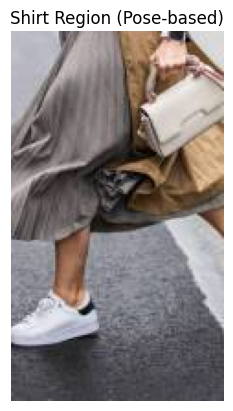

Dominant Shirt Color (RGB): [127 119 118]


In [67]:
# Step 5b: Extract Shirt Region and Estimate Color
# Use shoulder and hip keypoints to define a dynamic bounding box for upper torso


shirt_region = None  # Default
valid_shirt_crop = False  # Flag to prevent empty processing

if pose_results and pose_results.pose_landmarks:
    landmarks = pose_results.pose_landmarks.landmark

    # Get keypoints
    l_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    r_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
    l_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
    r_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]

    # Use min/max x for width and avg y for height
    left_x = min(l_shoulder.x, r_shoulder.x)
    right_x = max(l_shoulder.x, r_shoulder.x)
    top_y = (l_shoulder.y + r_shoulder.y) / 2
    bottom_y = (l_hip.y + r_hip.y) / 2

    # Convert normalized coords to pixels
    left = int(left_x * w)
    right = int(right_x * w)
    top = int(top_y * h)
    bottom = int(bottom_y * h)

    # Expand box a bit
    pad_x = int(0.05 * w)
    pad_y = int(0.05 * h)
    left = max(0, left - pad_x)
    right = min(w, right + pad_x)
    top = max(0, top - pad_y)
    bottom = min(h, bottom + pad_y)

    print(f"Shirt box: Left={left}, Right={right}, Top={top}, Bottom={bottom}")

    # Validate and extract region
    if right > left and bottom > top:
        shirt_region = img[top:bottom, left:right]
        valid_shirt_crop = shirt_region.size > 0

if valid_shirt_crop:
    # Show shirt region
    plt.imshow(cv2.cvtColor(shirt_region, cv2.COLOR_BGR2RGB))
    plt.title("Shirt Region (Pose-based)")
    plt.axis("off")
    plt.show()

    # Estimate color
    from sklearn.cluster import KMeans
    shirt_pixels = shirt_region.reshape((-1, 3))
    kmeans = KMeans(n_clusters=1, random_state=0).fit(shirt_pixels)
    dominant_color = kmeans.cluster_centers_[0].astype(int)
    print("Dominant Shirt Color (RGB):", dominant_color[::-1])

    # Draw on annotated image
    cv2.rectangle(img_annotated, (left, top), (right, bottom), (0, 255, 255), 2)
    cv2.putText(img_annotated, "Shirt", (left, top - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
else:
    print("Unable to extract valid shirt region from pose landmarks.")

In [75]:
# Step 6: Clothing Classification using CLIP
# This section uses the OpenAI CLIP model to classify the type of clothing (e.g., t-shirt, jacket)
# based on the extracted shirt region from the image.

# Load CLIP model (ViT-B/32 variant)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Convert OpenCV BGR image to RGB and prepare for CLIP
shirt_rgb = cv2.cvtColor(shirt_region, cv2.COLOR_BGR2RGB)
shirt_pil = Image.fromarray(shirt_rgb)
shirt_input = preprocess(shirt_pil).unsqueeze(0).to(device)

# Define a list of clothing category labels
clothing_labels = ["a person wearing a t-shirt",
    "a person wearing a button-up shirt",
    "a person wearing a formal blazer",
    "a person wearing a sleeveless tank top",
    "a person wearing a hooded sweatshirt",
    "a person wearing a dress",
    "a person wearing a jacket",
    "a person wearing a sweater"]
text_inputs = clip.tokenize(clothing_labels).to(device)

# Run the CLIP model to get similarity scores
with torch.no_grad():
    image_features = model.encode_image(shirt_input)
    text_features = model.encode_text(text_inputs)
    logits_per_image = image_features @ text_features.T
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# Clean and display result
top_label_raw = clothing_labels[probs[0].argmax()]
top_label = top_label_raw.replace("a person wearing a ", "")
confidence = probs[0].max()

if confidence < 0.6:
    print("Clothing type uncertain.")
else:
    print(f"Predicted clothing: {top_label} ({confidence * 100:.2f}%)")





Predicted clothing: dress (63.21%)


In [76]:
## Step 7: Face Landmark Detection with MediaPipe

mp_face_mesh = mp.solutions.face_mesh
with mp_face_mesh.FaceMesh(static_image_mode=True) as face_mesh:
    results = face_mesh.process(img_rgb)
    if results.multi_face_landmarks:
        print("Face landmarks detected.")
        for idx, landmark in enumerate(results.multi_face_landmarks[0].landmark[:5]):
            print(f"Landmark {idx}: x={landmark.x:.2f}, y={landmark.y:.2f}, z={landmark.z:.2f}")
    else:
        print("No facial landmarks found.")

No facial landmarks found.


## Final Summary Report

In [70]:
# Section 8: Final Summary Report (with Pose Info)
# Combine all key outputs, including pose estimation, into a clean summary

# Posture Analysis from Pose Estimation
posture = "Unknown"
if pose_results and pose_results.pose_landmarks:
    landmarks = pose_results.pose_landmarks.landmark
    left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
    right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]

    # Heuristic: compare horizontal positions of both shoulders
    shoulder_diff = abs(left_shoulder.x - right_shoulder.x)
    posture = "Facing Forward" if shoulder_diff < 0.1 else "Turned or Angled"

# Other Key Data
age_str = str(face.age) if faces else "N/A"
gender_str = "Male" if (faces and face.gender == 1) else "Female" if faces else "N/A"
emotion_str = f"{emotion[0]} ({emotion[1]*100:.1f}% confidence)" if emotion else "N/A"
shirt_color_str = str(tuple(dominant_color[::-1]))  # Convert BGR to RGB
clothing_type_str = f"{top_label} ({confidence * 100:.2f}%)" if top_label else "N/A"

# Combine All Into Final Summary
summary = f"""Face Analysis:
- Age: {age_str}
- Gender: {gender_str}

Emotion:
- Dominant Emotion: {emotion_str}

Clothing:
- Dominant Shirt Color (RGB): {shirt_color_str}
- Predicted Type: {clothing_type_str}

Pose:
- Posture: {posture}
"""

print(summary)


Face Analysis:
- Age: 34
- Gender: Female

Emotion:
- Dominant Emotion: happy (99.0% confidence)

Clothing:
- Dominant Shirt Color (RGB): (127, 119, 118)
- Predicted Type: a person wearing a dress (63.21%)

Pose:
- Posture: Facing Forward



## Annotated Image Output

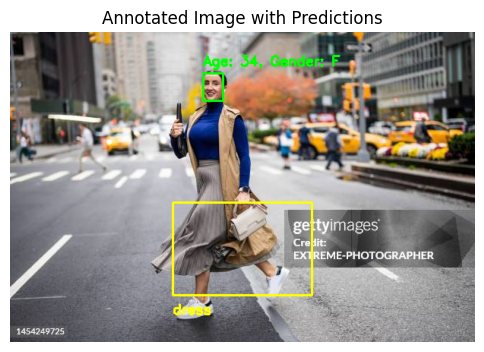

In [78]:

# Section 09: Annotated Image Output
# Annotate image with bounding boxes and overlayed info

annotated_img = img.copy()

# Draw face box and info
if faces:
    face_box = faces[0].bbox.astype(int)
    x1, y1, x2, y2 = face_box
    cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(annotated_img, f"Age: {face.age}, Gender: {'M' if face.gender==1 else 'F'}",
                (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

# Draw shirt box
h, w, _ = img.shape
sx1, sy1 = int(w*0.35), int(h*0.55)
sx2, sy2 = int(w*0.65), int(h*0.85)
cv2.rectangle(annotated_img, (sx1, sy1), (sx2, sy2), (0, 255, 255), 2)
cv2.putText(annotated_img, f"{top_label}", (sx1, sy2 + 25), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

# Display annotated image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.title("Annotated Image with Predictions")
plt.axis("off")
plt.show()


In [2]:
pip install git+https://github.com/openai/CLIP.git
pip install torch torchvision

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-1v4coymq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-1v4coymq
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

After installing an older version of TensorFlow, please restart the runtime and run all cells again.

In [3]:
pip install fer

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━

In [4]:
pip install tensorflow

In [5]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.


In [6]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=04f5b0974c2cfc63f926dceded59c93df9a6cdd7cd22dcc8b966a6a7e660fb7d
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [7]:
pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 57.8 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1060439 sha256=154f668cd35f1b407c3e7740519a59c198f147d48f02b83555f3c7510b8d4c47
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [8]:
pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.3 MB/s eta 0:00:00
